In [129]:
should_plot_autotune_without_retraining = False
should_plot_autotune_with_retraining = False
autotune_autoscheduler = "beam"

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv("results.csv", index_col="test")

In [132]:
if should_plot_autotune_without_retraining:
    df_auto = pd.read_csv("../autotune/noretrain/{}/results.csv".format(autotune_autoscheduler), index_col="test")
    df["auto"] = df_auto["time"]

if should_plot_autotune_with_retraining:
    df_auto = pd.read_csv("../autotune/retrain/{}/results.csv".format(autotune_autoscheduler), index_col="test")
    df["retrain"] = df_auto["time"]

In [133]:
df

,master,greedy,beam,manual,mcts
test,,,,,
bilateral_grid,0.009575,0.014288,0.013507,0.011785,0
local_laplacian,0.094920,0.162373,0.110560,0.063060,0
nl_means,0.145172,0.217584,0.065779,0.105065,0
lens_blur,0.020443,0.000000,0.000000,0.006252,0
camera_pipe,0.011569,0.009658,0.010281,0.006494,0
stencil_chain,0.020450,0.039226,0.030839,0.018307,0
harris,0.002938,0.003928,0.002050,0.002122,0
hist,0.005263,0.005864,0.005841,0.001563,0
max_filter,0.084361,0.143617,0.070085,0.080337,0


In [134]:
df_scaled = df.copy()

cols = ['master', 'greedy', 'beam', 'manual', 'mcts']

if should_plot_autotune_without_retraining:
    cols.append('auto')
if should_plot_autotune_with_retraining:
    cols.append('retrain')

for col in cols:
    df_scaled[col] /= df['manual']
    df_scaled[col] = 1 / df_scaled[col]

Text(0, 0.5, 'Normalized speedup')

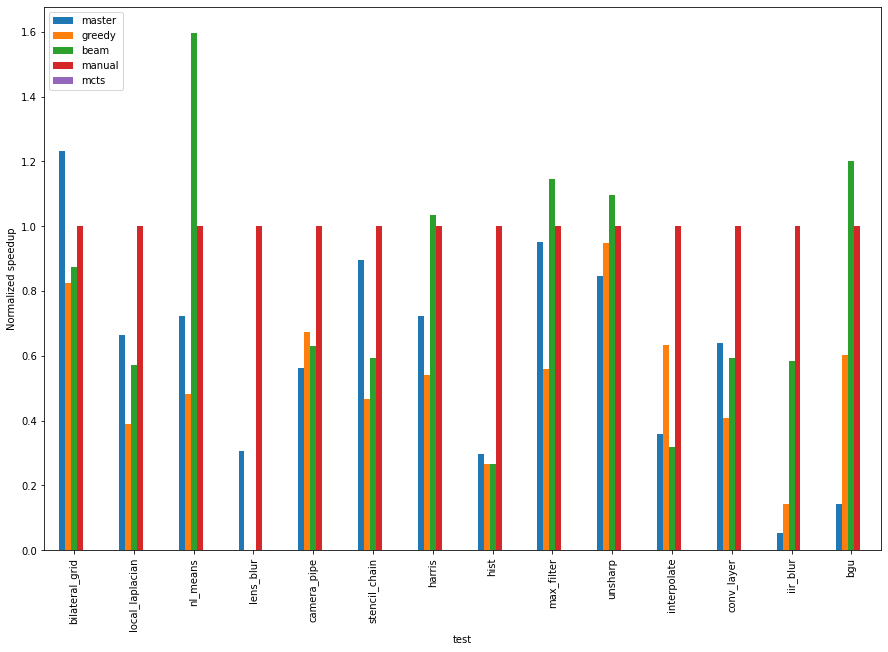

In [135]:
df_scaled.plot(kind='bar', figsize=(15,10))
plt.ylabel("Normalized speedup")

# "standalone_autoscheduler" branch

In [41]:
df_scaled = df.copy()

cols = ['master', 'greedy', 'beam', 'manual']
for col in cols:
    df_scaled[col] /= df['master']
    df_scaled[col] = 1 / df_scaled[col]

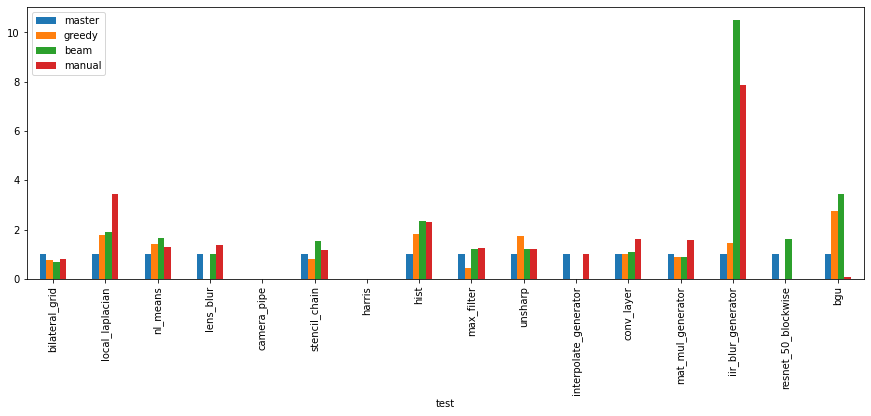

In [42]:
df_scaled.plot(kind='bar', figsize=(15,5))

* Bilateral grid: Does not match. Greedy should do better than master, and beam should be better than greedy. Manual should be slowest.
* Local laplacion: Does not match.